#### Primero importamos las librerias necesarias

In [1]:
# Para convertirlo en un df
import pandas as pd
# Para cálculos numericos
import numpy as np
# Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
# Para normalizar los datos
from sklearn.preprocessing import MinMaxScaler
# Para entrenar el modelo
from sklearn.linear_model import LinearRegression
# Para evaluar el modelo
from sklearn.metrics import mean_squared_error

## 1.- **Recopilación de Datos**

Este conjunto de datos se encuentra en esta pagina:
https://www.kaggle.com/datasets/camnugent/california-housing-prices

Es importante mirarlo para entenderlo mejor

In [2]:
# Vamos a leer estos datos para entenderlo mejor
df = pd.read_csv('../../3.- Datasets\housing.csv')

In [3]:
df2 = df.copy()

#### Vamos a añadir algunas imperfecciones a nuestro codigo para mas adelante

In [4]:
# Seleccionar algunas entradas aleatorias para modificar
filas_a_modificar = np.random.choice(df.index, size=3, replace=False)
columnas_a_modificar = np.random.choice(df.columns, size=3, replace=False)

# Asegurarte de que la columna 'median_house_value' no esté en columnas_a_modificar
columnas_a_modificar = [col for col in columnas_a_modificar if col != 'median_house_value']

# Modificar aleatoriamente algunas entradas, excluyendo 'median_house_value'
df.loc[filas_a_modificar, columnas_a_modificar] = np.nan

# Verificar que no se hayan añadido nulos a 'median_house_value'
valores_nulos_median_house_value = df['median_house_value'].isnull().sum()
print(f"Valores nulos en 'median_house_value': {valores_nulos_median_house_value}")

Valores nulos en 'median_house_value': 0


## **2.- Exploración y Análisis de Datos**

In [5]:
# Mostramos las 5 primeras filas de mi df
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20637 non-null  float64
 3   total_rooms         20637 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20637 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Aqui se ve que todas las columnas son de tipo numerico, menos la ultima que es una categoria

In [7]:
#vemos algunas metricas como la mediana, minimo, maximo etc..
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20637.000000,20637.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.640645,2635.705723,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585904,2181.730484,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Vamos a visualizar un poco nuestros datos

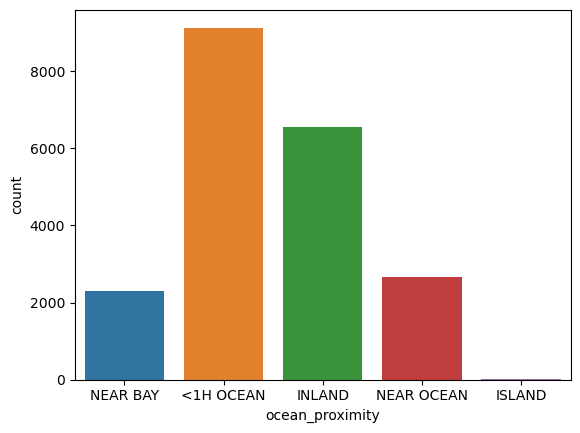

In [8]:
sns.countplot(x='ocean_proximity', data=df)
plt.show()

#### Esta es la distribucion de la categoria de proximidad al oceano

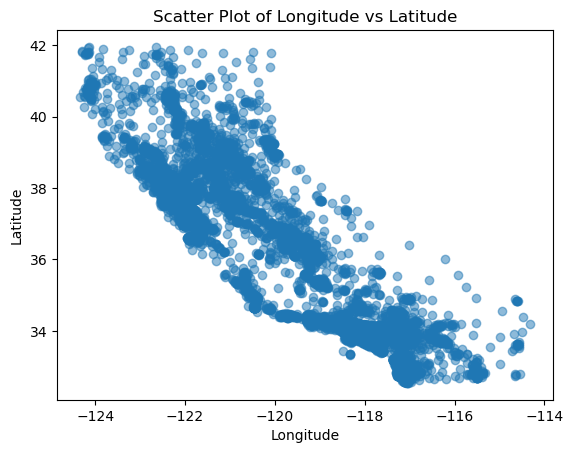

In [31]:
# Gráfico de dispersión de longitud y latitud
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Ok, tiene la forma de california xd

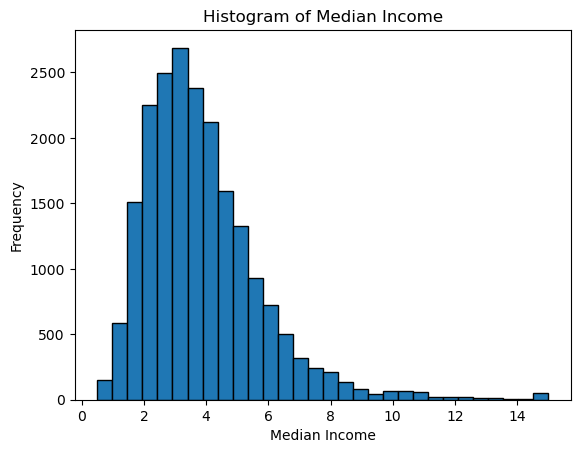

In [32]:
# Miramos los ingresos medios
plt.hist(df['median_income'], bins=30, edgecolor='black')
plt.title('Histogram of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

## 3.- División de Datos

#### Hay que dividir los datos en entrenamiento, evaluación y prueba

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# importamos train_test_split para dividir los datos
from sklearn.model_selection import train_test_split

# en este caso solo lo haremos en entrenamiento y evaluacion
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [11]:
print(f'la longitud de train_set es de: {len(train_set)}')
print(f'la longitud de test_set es de: {len(test_set)}')

la longitud de train_set es de: 18576
la longitud de test_set es de: 2064


#### Ahora separamos las etiquetas (salidas 'y'), de las caracteristicas (entradas 'x')

#### en este cado la etiqueta que tratamos de predecir es la de el precio

In [12]:
# separamos el de entrenamiento 
x_train = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value'].copy()

In [13]:
# Ahora los de validación
x_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

## 4.- Preprocesamiento de datos

#### Antes de entrenar al módelo, hay que preparar los datos, como imputar, normalizar o estandarizar y codificar

In [14]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5564,-118.29,33.91,41.0,2475.0,532.0,1416.0,470.0,3.8372,<1H OCEAN
16016,-122.46,37.73,52.0,3547.0,506.0,1276.0,491.0,8.0069,NEAR BAY
17131,-122.15,37.46,30.0,4198.0,1244.0,2678.0,1147.0,3.6712,NEAR BAY
11752,-121.21,38.76,16.0,1608.0,296.0,792.0,286.0,3.1583,INLAND
2308,-119.75,36.83,15.0,2793.0,436.0,1411.0,441.0,4.9292,INLAND


##### Los NaN son los valores nulos que hay que eliminar

In [15]:
columns_with_nulls = x_train.columns[x_train.isnull().any()]
print(columns_with_nulls)

Index(['housing_median_age', 'total_rooms', 'ocean_proximity'], dtype='object')


In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      3
total_rooms             3
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         3
dtype: int64

#### Estas son las columnas con valores nulos

### 4.1.- Imputar

In [17]:
#para imputar los datos importamos simpleimputer
from sklearn.impute import SimpleImputer

# seleccionamos las columnas numericas
numeric_columns = x_train.select_dtypes(include=['number']).columns

# seleccionamos las categorias
cat_columns = x_train.select_dtypes(include=['object']).columns

# Imputamos valores numéricos con la mediana
numeric_imputer = SimpleImputer(strategy='median')# instanciamos ese imputador numerico
x_train[numeric_columns] = numeric_imputer.fit_transform(x_train[numeric_columns])

# Imputamos las categorias con el valor mas frecuente
imputer_categorical = SimpleImputer(strategy='most_frequent')# instanciamos ese imputador categorico
x_train[cat_columns] = imputer_categorical.fit_transform(x_train[cat_columns])

#### Los valores nulos se han eliminado, en cambio esta la media y la categoria mas frecuente

In [18]:
columns_with_nulls = x_train.columns[x_train.isnull().any()]
print(columns_with_nulls)

Index([], dtype='object')


### 4.2.- Normalizar

#### Ahora vamos a normalizar los datos, es decir, vamos a hacer que los valores no tengan mucha diferencia entre si, sino que tengan una escala entre 0 y 1

In [19]:
# lo haremos con minmaxscaler

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionamos solo las columnas numéricas para la normalización
numeric_cols = x_train.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])

# Ahora, el df contiene las columnas numéricas normalizadas
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5564,0.603586,0.144681,0.784314,0.062897,0.082402,0.039603,0.077125,0.230155,<1H OCEAN
16016,0.188247,0.551064,1.000000,0.090162,0.078367,0.035679,0.080579,0.517717,NEAR BAY
17131,0.219124,0.522340,0.568627,0.106720,0.192893,0.074974,0.188456,0.218707,NEAR BAY
11752,0.312749,0.660638,0.294118,0.040846,0.045779,0.022114,0.046867,0.183335,INLAND
2308,0.458167,0.455319,0.274510,0.070985,0.067505,0.039463,0.072357,0.305465,INLAND


### 4.3.- Codificar

#### El ultimo paso seria codificarlo, es decir, convertir las categorias (letras), en números

In [20]:
# Aplicar One-Hot Encoding a las columnas categóricas en x_train
x_train = pd.get_dummies(x_train, columns=['ocean_proximity'], dtype=float)

#### ok, x_train ya esta, ahora hay que hacer lo mismo con x_test

#### Lo se, es un coñaso empezar de nuevo, pues por eso estan los pipelines que lo usaremos en otro momento

In [21]:
#para imputar los datos importamos simpleimputer
from sklearn.impute import SimpleImputer

# seleccionamos las columnas numericas
numeric_columns = x_test.select_dtypes(include=['number']).columns

# seleccionamos las categorias
cat_columns = x_test.select_dtypes(include=['object']).columns

# Imputamos valores numéricos con la mediana
numeric_imputer = SimpleImputer(strategy='median')# instanciamos ese imputador numerico
x_test[numeric_columns] = numeric_imputer.fit_transform(x_test[numeric_columns])

# Imputamos las categorias con el valor mas frecuente
imputer_categorical = SimpleImputer(strategy='most_frequent')# instanciamos ese imputador categorico
x_test[cat_columns] = imputer_categorical.fit_transform(x_test[cat_columns])

In [22]:
# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionamos solo las columnas numéricas para la normalización
numeric_cols = x_test.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
x_test[numeric_cols] = scaler.fit_transform(x_test[numeric_cols])

# Ahora, el df contiene las columnas numéricas normalizadas

In [23]:
# Aplicar One-Hot Encoding a las columnas categóricas en x_test
x_test = pd.get_dummies(x_test, columns=['ocean_proximity'], dtype=float)

In [24]:
# Alinear las columnas de x_test con x_train
x_train, x_test = x_train.align(x_test, join='right', axis=1)

## 5.- Entrenamiento

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

##### Ya tenemos el modelo 🎉
##### Ahora solo nos toca predecir nuevos valores y ver quetal se comporta este modelo

In [26]:
# Ahora haremos algunas predicciones con nuestro conjunto de datos de test
y_pred = model.predict(x_test)

In [27]:
# Estas son las 5 primeras predicciones de mi modelo para los datos x_test
y_pred[0:5]

array([-69811.22498087, -18552.9983256 , 137745.92401758, 110465.16802818,
       169589.87558401])

## 6.- Evaluación

#### Vamos a evaluar nuestro modelo para ver que tal rinde

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 30141873791.13874
Coeficiente de Determinación (R²): -1.2601726381734655


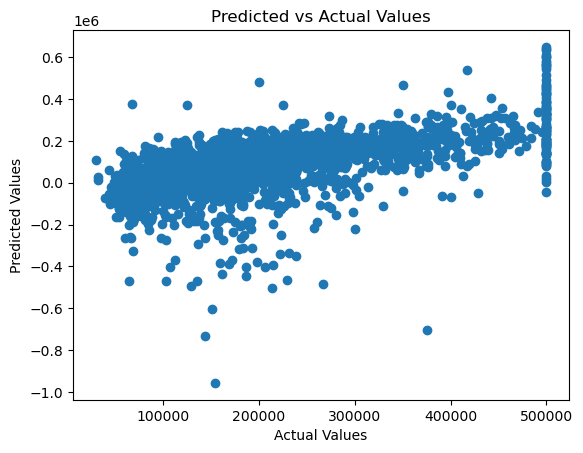

In [34]:
# Visualizar predicciones frente a valores reales
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()